# Polynomial Regression

## Data Preprocessing

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [37]:
# Skipping as to use the most of the data for training (due to small size of input)
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [38]:
print(X)
print(y.reshape((len(y), 1)))


[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


##Training Linear regression on Whole set

In [39]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

LinearRegression()

In [40]:
y_lin_predicted = linear_regressor.predict(X)

In [41]:
print('Linear prediction of level 7 ', linear_regressor.predict(X))
print('Linear Regression intercepts ', linear_regressor.intercept_)
print('Linear Regression co efficients ', linear_regressor.coef_)

Linear prediction of level 7  [-114454.54545455  -33575.75757576   47303.03030303  128181.81818182
  209060.60606061  289939.39393939  370818.18181818  451696.96969697
  532575.75757576  613454.54545455]
Linear Regression intercepts  -195333.33333333337
Linear Regression co efficients  [80878.78787879]


## training the Ploynomial Model

In [42]:
# we will create a matrix of features that correspond to the x1, x1^2, x1^n
# and use it in multiple linear regression model
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2) # we are starting with degree 2
X_poly = poly_reg.fit_transform(X) # matrix of input features is transformed to a matirx of features of degree 2

lin_reg_deg2 = LinearRegression()
lin_reg_deg2.fit(X_poly, y)


LinearRegression()

In [43]:
print(X_poly)
Y_predicted_deg2 = lin_reg_deg2.predict(X_poly)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


In [44]:
# we will create a matrix of features that correspond to the x1, x1^2, x1^n
# and use it in multiple linear regression model
from sklearn.preprocessing import PolynomialFeatures
poly_reg_4 = PolynomialFeatures(degree = 4) # we are starting with degree 4
X_poly_4 = poly_reg_4.fit_transform(X) # matrix of input features is transformed to a matirx of features of degree 2

lin_reg_deg4 = LinearRegression()
lin_reg_deg4.fit(X_poly_4, y)
Y_predicted_deg4 = lin_reg_deg4.predict(X_poly_4)


In [45]:
print(X_poly_4)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


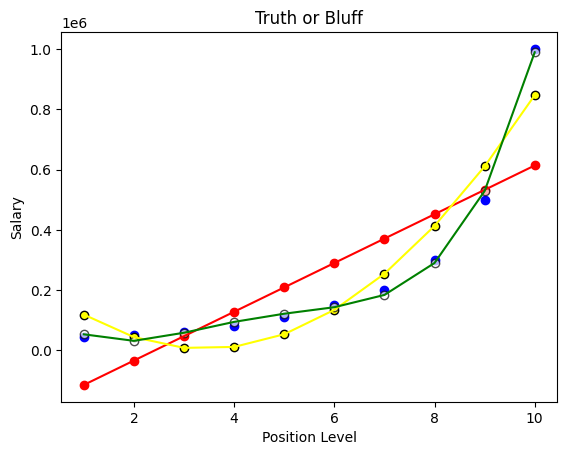

In [46]:
plt.scatter(X, y, color='blue')
plt.plot(X, y_lin_predicted, color='red')
plt.scatter(X, y_lin_predicted, color='red')
plt.plot(X, Y_predicted_deg2, color='yellow')
plt.scatter(X, Y_predicted_deg2, edgecolors='black', color='yellow')
plt.plot(X, Y_predicted_deg4, color='green')
plt.scatter(X, Y_predicted_deg4, edgecolors='black', color='white', alpha=0.7)
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.title("Truth or Bluff")
plt.show()

In [49]:
print('Linear regression prediction for position 6.5 ', linear_regressor.predict([[6.5]]))
print('Linear regression degree 2 prediction for position 6.5 ', lin_reg_deg2.predict(poly_reg.transform([[6.5]])))
print('Linear regression degree 4 prediction for position 6.5 ', lin_reg_deg4.predict(poly_reg_4.transform([[6.5]])))

Linear regression prediction for position 6.5  [330378.78787879]
Linear regression degree 2 prediction for position 6.5  [189498.10606061]
Linear regression degree 4 prediction for position 6.5  [158862.45265155]


## Plot 4th degree prediction curve (smoothened)

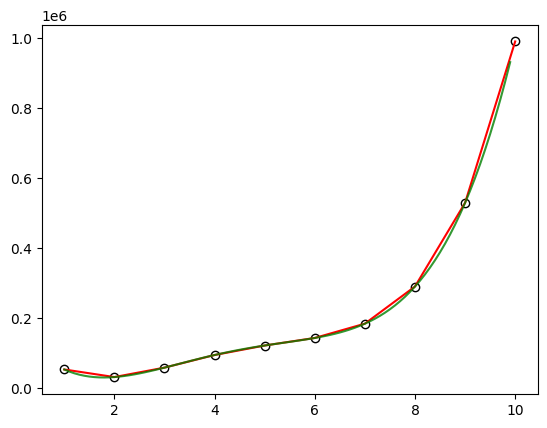

In [60]:
plt.scatter(X, Y_predicted_deg4, edgecolors='black', color='white')
plt.plot(X, Y_predicted_deg4, color='red')

X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.plot(X_grid, lin_reg_deg4.predict(poly_reg_4.transform(X_grid)), color='green', alpha=0.8)
plt.show()